# sai ram krishna durgi - Prediction using Supervised ML
### TSF

### In this project we will predict scores of a student given hours spent studying

#### importing necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

* reading the dataset from a csv file and storing it in student_scores variable

In [2]:
student_scores = pd.read_csv('http://bit.ly/w-data')

#### getting an overview of dataset

In [3]:
student_scores.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
student_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


* as we can we the data set has 25 entries with 2 columns with 25 non-null values each.
* first column is hours and is of type float64 i.e consists of floating point numbers.
* second column is scores and is of type int63 i.e consists of integers.

In [5]:
student_scores.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


* in the above table we can see that 25% of students have spent 2.7 or less hours and have scored 30 or less.
* 50 % of students have spent 4.8 or less hours and have scored 47 or less.
* 75 % of students have spent 7.4 or less hours and have scored 75 or less.
* max hours spent for studying in the given dataset is 9.2 and max score is 95.
* min hours spent for studying in the given dataset is 1.1 and max score is 17.

* changing column names to lower case (for easy use)

In [6]:
student_scores.columns = student_scores.columns.str.lower()
student_scores.columns

Index(['hours', 'scores'], dtype='object')

* frequency/number of students for each unique mark present in dataset. 
* for ex: 3 students have scored 30 marks, only 1 student has scored 95 marks

In [7]:
score_value_counts=student_scores['scores'].value_counts().head()
score_value_counts

30    3
95    1
62    1
85    1
86    1
Name: scores, dtype: int64

* plot describing top 5 frequencies of marks

(array([30, 95, 62, 85, 86]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

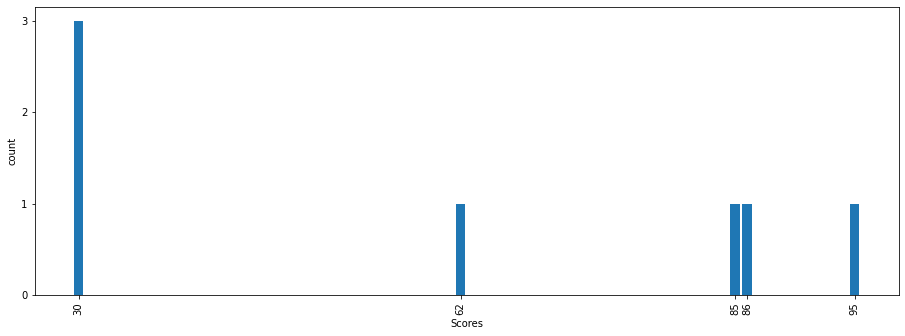

In [8]:
fig=plt.figure()
ax=fig.add_axes([0,0,2,1])
ax.bar(score_value_counts.keys().tolist(),score_value_counts.tolist())
ax.set_xticks(score_value_counts.keys().tolist())
ax.set_yticks(np.arange(4))
ax.set_xlabel('Scores')
ax.set_ylabel('count')
plt.xticks(rotation=90)

In [9]:
student_scores['hours'].value_counts().head()

2.5    2
2.7    2
3.8    1
8.5    1
3.5    1
Name: hours, dtype: int64

In [10]:
student_scores.isnull().sum()

hours     0
scores    0
dtype: int64

* Clearly we can observe that hours spent and marks scored are closely co-related.

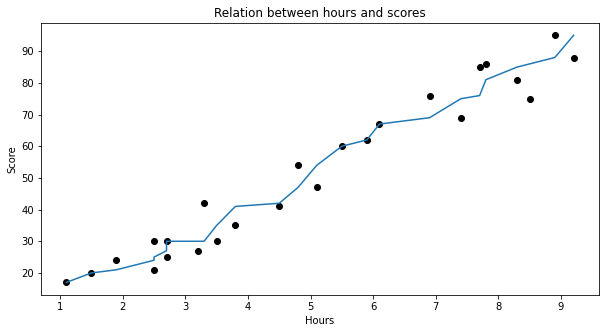

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(student_scores['hours'],student_scores['scores'],color='black')
plt.plot(student_scores['hours'].sort_values(),student_scores['scores'].sort_values())
plt.xlabel('Hours')
plt.ylabel('Score')
plt.title('Relation between hours and scores');

In [12]:
corrmat = student_scores.corr()
corrmat

,hours,scores
hours,1.000000,0.976191
scores,0.976191,1.000000


* in the below heatmap we can see that hours and scores have a co-relation of upto 98%

<AxesSubplot:>

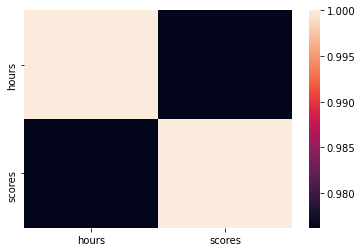

In [13]:
sns.heatmap(corrmat)

### Using linear regression to train and test dataset

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X=student_scores.iloc[:,:1]
Y=student_scores.iloc[:,1]

* below we have split the dataset into 4 parts and have set the test size to 0.1 meaning 10% of total data is part of test data set

In [17]:
train_features, test_features, train_answers, test_answers = train_test_split(X,Y,test_size=0.1,random_state=1)
# train_features, test_features, train_answers, test_answers = train_test_split(student_scores['hours'].to_numpy().reshape(-1,1),student_scores['scores'],test_size=0.1,random_state=1)

In [18]:
lr = LinearRegression()
lr.fit(train_features,train_answers);
lr_predictions=lr.predict(test_features)
mse = mean_squared_error(test_answers,lr_predictions)
rmse = mse**0.5
print('linear regression mse : ', mse)
print('linear regression rmse : ', rmse)

linear regression mse :  43.900302009936205
linear regression rmse :  6.625730300120599


##### we got a rooted mean squared error of 6.625 meaning our predictions of scores and acutal scores differ by 6 marks

In [19]:
def predictScoreLR(hours):
    for hour in hours:
        print('if student studies for ',hour,'hrs. he/she will score',lr.predict([[hour]])[0])

#### predicting for custom inputs.

In [20]:
predictScoreLR([9.5,2,4,1,8])

if student studies for  9.5 hrs. he/she will score 96.12647045634591
if student studies for  2 hrs. he/she will score 20.227941286378385
if student studies for  4 hrs. he/she will score 40.467549065036394
if student studies for  1 hrs. he/she will score 10.108137397049381
if student studies for  8 hrs. he/she will score 80.94676462235242


# For 9.5 hours studying time a student will get a score of 96.12

### using other models

In [21]:
from sklearn.tree import DecisionTreeRegressor

In [22]:
re=DecisionTreeRegressor(random_state=1,min_samples_leaf=1)
re.fit(train_features,train_answers)
re_predictions = re.predict(test_features)
mse = mean_squared_error(test_answers,re_predictions)
rmse = mse**0.5
print('Decision tree regressor mse : ', mse)
print('Decision tree regressor rmse : ', rmse)

Decision tree regressor mse :  83.33333333333333
Decision tree regressor rmse :  9.128709291752768


In [23]:
from sklearn.linear_model import LogisticRegression

* using logistic regression, generally used for classification problems.

In [24]:
lg = LogisticRegression()
lg.fit(train_features,train_answers);
lg_predictions=lg.predict(test_features)
mse = mean_squared_error(test_answers,lg_predictions)
rmse = mse**0.5
print('Logistic Regression mse : ', mse)
print('Logistic Regression rmse : ', rmse)

Logistic Regression mse :  116.33333333333333
Logistic Regression rmse :  10.785793124908958


/home/sai/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
